**Adult Salary Classification Exercise**

**The goal of this project is to create accurate models to predict whether an individual will have a salary >50k based upon certain attributes such as education, age, sex, etc.**



Name: Craig Gossen

Date: 12/1/2022

Data source: https://archive.ics.uci.edu/ml/datasets/adult

Each row represents an individual person. 

This set of data has 14 features contained in 32,561 rows. 'Salary' is the target.  


#Load and Clean Data

In [ ]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/Machine Learning Fundamentals/03 Week 03: Classification Models/adult.data'
df = pd.read_table(filename, delimiter = ',' , header=None)

In [ ]:
eda_df = df

In [ ]:
eda_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'years-education', 'marital-status', 'occupation',\
             'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary' ]
col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'years-education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [ ]:
eda_df.columns = col_names
eda_df.head()

,age,workclass,fnlwgt,education,years-education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
eda_df.shape

(32561, 15)

In [ ]:
eda_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
years-education     int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
salary             object
dtype: object

In [ ]:
eda_df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [ ]:
eda_df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
eda_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
years-education    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
salary             0
dtype: int64

In [ ]:
eda_df.head()

,age,workclass,fnlwgt,education,years-education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
eda_df.drop(columns='fnlwgt', inplace = True)

In [ ]:
eda_df.head()

,age,workclass,education,years-education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Loop through the columns to see the value counts
dtypes = eda_df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols
for col in str_cols:
  print(f'~Column = {col}')
  print(eda_df[col].value_counts(dropna=False))
  print( '\n\n')

~Column = workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64



~Column = education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64



~Column = marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
eda_df.replace('?', np.nan, inplace = True)

**Data** is cleaned. '?' data is left in for occupation as a large number of columns/variables are present. Workclass will be imputed. 

Data contains numeric and categorical data which will need to be scaled and OHE. 



#Exploratory Visuals


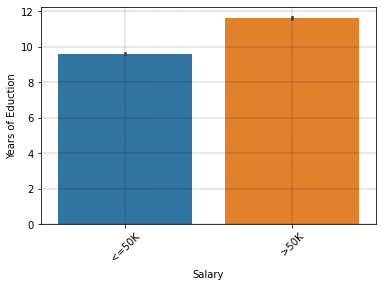

In [ ]:
#Barplot to determine relationshipe between salary and education years.
plt.figure(figsize=(6, 4))
sns.barplot(data = eda_df, 
            x = 'salary', 
            y = 'years-education');

plt.xlabel('Salary')
plt.ylabel('Years of Eduction')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.25)
plt.xticks(rotation = 45)

plt.show()

The larger salary group has roughly 3 years of additional education over the lower salary group. 

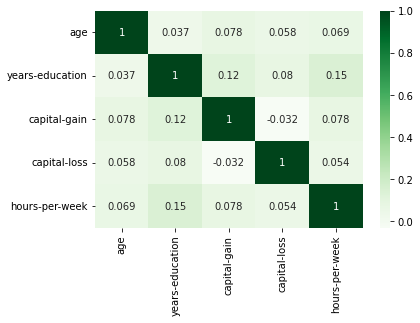

In [ ]:
#Correlation
corr = eda_df.corr()

#Plot Correlation
sns.heatmap(corr, cmap = 'Greens', annot = True)

There is minimal correlation between numeric data columns. 

#Preprocessing

In [ ]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [ ]:
#Train Test Split (TTS) Prep
X = eda_df.drop(columns = 'salary')
y = eda_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Check class balance
y_train.value_counts(normalize = True)

 <=50K    0.757821
 >50K     0.242179
Name: salary, dtype: float64

In [ ]:
#Set Imputer
mean_imputer = SimpleImputer(strategy='mean')
frequency_imputer = SimpleImputer(strategy = 'most_frequent')

#Instantiate OneHotEncoder and Standard Scaler
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()


# Instantiate the categorical and numeric column selectors to select appropriate columns

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Setup the pipelines for the numeric and categorical (nominal only) data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(frequency_imputer, ohe)

# Make tuples for preprocessing the categorical and numeric columns
numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, num_selector)


preprocessor = make_column_transformer(numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8d886e9370>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8d886e9370>)])

Fuction for classification models

In [ ]:
## define the evaluate_classification function here

def evaluate_classification(lgr_pipe, X_test, y_test, label="Test Data"):
  test_preds = lgr_pipe.predict(X_test)


   ## Print classification report for the test data (and make it pretty!)
  print('---'*20)
  print(f"[i] CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

#Balance the Data - STILL TO BE FINISHED


In [ ]:
#Check class balance
eda_df['salary'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

Data is unbalanced. The data will be oversampled using SMOTE

In [ ]:
#Create model pipeline with scaler, SMOTE, and model
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
#preprocessor = make_pipeline(preprocessor, smote)
preprocessor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8d886e9370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8d886e9370>)])),
                ('smote', SMOTE())])

#Logistic Regression Model - need to figure out why error was with SMOTE

In [ ]:
#Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, \
ConfusionMatrixDisplay, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [ ]:
# Create a model pipeline with the preprocessor 
log_reg = LogisticRegression()

log_pipe = make_pipeline(preprocessor, log_reg)
log_pipe

TypeError: ignored

In [ ]:
#Fit and predict the data
log_pipe.fit(X_train, y_train)
test_preds = log_pipe.predict(X_test)


In [ ]:
evaluate_classification(log_pipe, X_test, y_test, label='Test Data')

The model shows an accuracy of 85%. It is also good at predicting true negatives (<50K) is poor at predicting positives (39% false positives with 61% of true positives). Changing the threshold may improve model performance. 


#KNN

In [ ]:
#Imports
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Instantiate KNN
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Create a pipeline
knn_pipe = make_pipeline(preprocessor, knn)

#Fit onto the training data
knn_pipe.fit(X_train, y_train)

In [ ]:
#Predict the values for the test set
predictions = knn_pipe.predict(X_test)
predictions

In [ ]:
#Evaluaate the performance 
acc_score = knn_pipe.score(X_test, y_test)
acc_score

In [ ]:
#Test Accuracy/Tune the model
krange = range(1, 25)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#Visualize accuracy over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#Print best results
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

In [ ]:
# create new model with best k
knn_final_pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors = bestk))
knn_final_pipe.fit(X_train, y_train)

# Display confusion matrix for KNN with best k
plot_confusion_matrix(knn_final_pipe, X_test, y_test, cmap = 'Blues', normalize='true')

KNN also is good at predicting true negatives (<50k) but struggles with predicting true positives (only at 59%).

#Baseline Model (Dummy Classifier) - TO DO

#Final Thoughts

**The data suggests there are many variables that can be arranged to determine a salary >50k. There are models to predict with a high accuracy (93% & 94%) a low salary <50k.**